In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

In [2]:
raw = pd.read_csv('../../../../datasets/paris_listings.csv')
df = raw.copy()
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


In [3]:
df_lodging = df[['id', 'host_id','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
                 'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
                 'beds','amenities','price','minimum_nights','maximum_nights']]
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_response_time': '답변_평균시간',
    'host_response_rate': '문의_응답률',
    'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_review = df[['number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]

df_review = df_review.rename(columns={
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})

df_lodging['url']=df['listing_url']

In [4]:
df = df[['id', 'host_id','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_response_time': '답변_평균시간',
    'host_response_rate': '문의_응답률',
    'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})

df['url'] = raw['listing_url']

In [14]:
# NULL이 아닌 행들만 필터링
filtered_df = df.dropna(subset=['욕실수', '침실수', '침대수', '숙소_가격'])

# 데이터 타입을 숫자형으로 변환 (가격에서 통화 기호 제거 등이 필요할 수 있습니다.)
filtered_df['숙소_가격'] = filtered_df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 상관계수 계산
correlation_matrix = filtered_df[['욕실수', '침실수', '침대수', '숙소_가격']].corr()

# 상관계수 출력
print(correlation_matrix)

            욕실수       침실수       침대수     숙소_가격
욕실수    1.000000  0.629612  0.547907  0.235181
침실수    0.629612  1.000000  0.665821  0.233313
침대수    0.547907  0.665821  1.000000  0.172403
숙소_가격  0.235181  0.233313  0.172403  1.000000


C:\Users\ciw96\AppData\Local\Temp\ipykernel_35664\2569108257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['숙소_가격'] = filtered_df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


In [17]:
df['숙소_가격'].unique()

array(['$250.00', '$140.00', '$107.00', ..., '$1,062.00', '$2,465.00',
       '$2,324.00'], dtype=object)

C:\Users\ciw96\AppData\Local\Temp\ipykernel_35664\4062176459.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['숙소_가격'] = filtered_df2['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


                숙소_가격  숙소_가격_리뷰점수      리뷰점수  숙소_정확성_리뷰점수  숙소_청결도_리뷰점수  \
숙소_가격        1.000000    0.020178  0.015148     0.008368     0.031630   
숙소_가격_리뷰점수   0.020178    1.000000  0.827627     0.781242     0.688248   
리뷰점수         0.015148    0.827627  1.000000     0.835492     0.749777   
숙소_정확성_리뷰점수  0.008368    0.781242  0.835492     1.000000     0.698527   
숙소_청결도_리뷰점수  0.031630    0.688248  0.749777     0.698527     1.000000   
숙소_체크인_리뷰점수  0.000295    0.613686  0.663820     0.628723     0.526467   
숙소_소통_리뷰점수  -0.013608    0.676938  0.740355     0.690981     0.556861   
숙소_위치_리뷰점수   0.027167    0.517443  0.512091     0.492135     0.410922   

             숙소_체크인_리뷰점수  숙소_소통_리뷰점수  숙소_위치_리뷰점수  
숙소_가격           0.000295   -0.013608    0.027167  
숙소_가격_리뷰점수      0.613686    0.676938    0.517443  
리뷰점수            0.663820    0.740355    0.512091  
숙소_정확성_리뷰점수     0.628723    0.690981    0.492135  
숙소_청결도_리뷰점수     0.526467    0.556861    0.410922  
숙소_체크인_리뷰점수     1.000000    0.706685

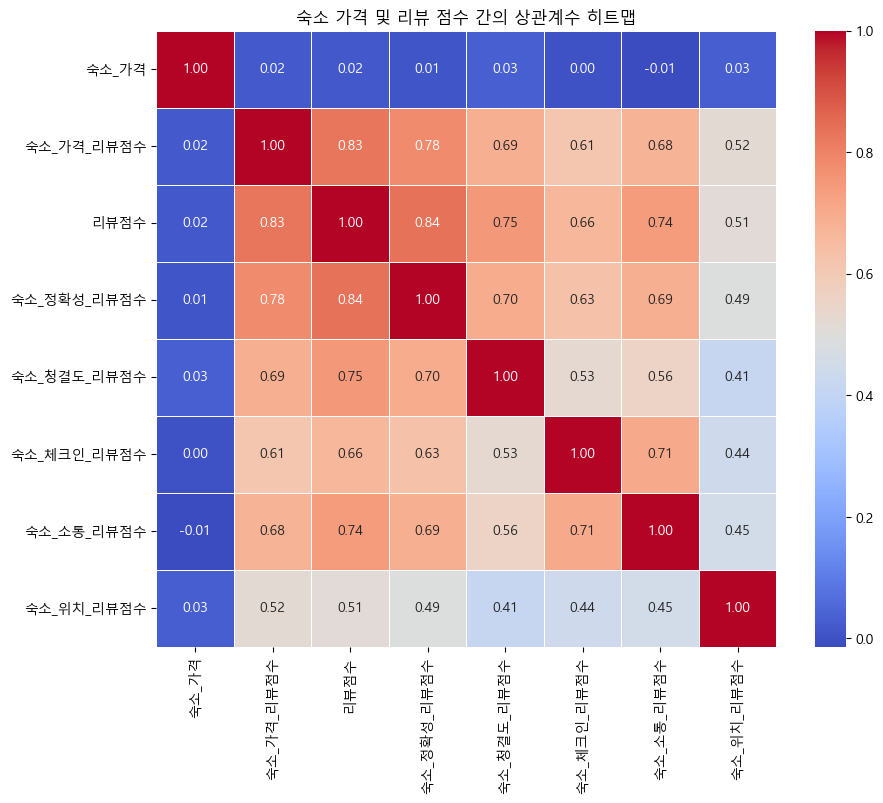

In [21]:


# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# NULL이 아닌 행들만 필터링
filtered_df2 = df.dropna(subset=['숙소_가격','숙소_가격_리뷰점수','리뷰점수','숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수'])

# 데이터 타입을 숫자형으로 변환 (가격에서 통화 기호 제거 등이 필요할 수 있습니다.)
filtered_df2['숙소_가격'] = filtered_df2['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 상관계수 계산
correlation_matrix = filtered_df2[['숙소_가격','숙소_가격_리뷰점수','리뷰점수','숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수']].corr()

# 상관계수 출력
print(correlation_matrix)

# 상관계수 매트릭스를 히트맵으로 표시
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

In [36]:
#숙소가격 null값 제거
check1= df[~df['숙소_가격'].isnull()]
#가격 앞 통화기호 제거
check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

check1.groupby('숙소_지역')['숙소_가격'].mean().sort_values()


C:\Users\ciw96\AppData\Local\Temp\ipykernel_35664\545092135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


숙소_지역
Ménilmontant           192.039146
Buttes-Chaumont        199.299042
Buttes-Montmartre      214.978412
Popincourt             219.104277
Reuilly                224.971357
Observatoire           234.026818
Entrepôt               236.596581
Bourse                 245.875620
Gobelins               254.422979
Vaugirard              269.440788
Temple                 283.740208
Hôtel-de-Ville         295.328256
Batignolles-Monceau    299.238785
Opéra                  324.003730
Luxembourg             345.306178
Panthéon               359.882784
Louvre                 376.876310
Palais-Bourbon         429.176726
Élysée                 454.163295
Passy                  522.441650
Name: 숙소_가격, dtype: float64

In [37]:
#숙소가격 null값 제거
check1= df[~df['숙소_가격'].isnull()]
#가격 앞 통화기호 제거
check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

check1.groupby('숙소_유형')['숙소_가격'].mean().sort_values()

C:\Users\ciw96\AppData\Local\Temp\ipykernel_35664\418051697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


숙소_유형
Shared room         84.616725
Private room       227.618954
Entire home/apt    295.183123
Hotel room         310.537175
Name: 숙소_가격, dtype: float64

In [24]:
df['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [25]:
# NULL이 아닌 행들만 필터링
filtered_df2 = df.dropna(subset=['숙소_지역', '숙소_유형','숙소_가격'])

# 데이터 타입을 숫자형으로 변환 (가격에서 통화 기호 제거 등이 필요할 수 있습니다.)
filtered_df2['숙소_가격'] = filtered_df2['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 상관계수 계산
correlation_matrix = filtered_df2[['숙소_지역', '숙소_유형','숙소_가격']].corr()

# 상관계수 출력
print(correlation_matrix)

# 상관계수 매트릭스를 히트맵으로 표시
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

C:\Users\ciw96\AppData\Local\Temp\ipykernel_35664\1396613268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['숙소_가격'] = filtered_df2['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


ValueError: could not convert string to float: 'Observatoire'

In [ ]:
df[df['리뷰수']==0].head(10)

,숙소_id,호스트_id,답변_평균시간,문의_응답률,예약_수락률,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,...,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url
19,9359,28422,NaN,NaN,NaN,f,4.0,Louvre,Entire home/apt,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/9359
37,191531,926484,NaN,NaN,NaN,f,2.0,Temple,Entire home/apt,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/191531
70,214596,1107785,NaN,NaN,NaN,f,2.0,Observatoire,Entire home/apt,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/214596
82,17316,67192,NaN,NaN,0%,f,1.0,Entrepôt,Entire home/apt,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/17316
126,25450,105570,NaN,NaN,NaN,f,1.0,Entrepôt,Entire home/apt,6,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/25450
179,261744,711662,within an hour,100%,92%,f,3.0,Palais-Bourbon,Entire home/apt,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/261744
184,115107,379042,within a few hours,100%,85%,t,4.0,Buttes-Montmartre,Entire home/apt,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/115107
224,285108,1484225,NaN,NaN,NaN,f,1.0,Buttes-Chaumont,Private room,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/285108
225,311499,1602320,NaN,NaN,NaN,f,2.0,Buttes-Montmartre,Entire home/apt,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/311499
227,286005,1487808,NaN,NaN,NaN,f,3.0,Ménilmontant,Private room,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/286005


In [ ]:
import pandas as pd
import re

# 데이터 로드
check = pd.read_csv('../../Data/침실_침대_욕실수/London_침실대욕_1.csv', encoding='cp949')

# 결측치가 있는 행 제거
check = check[~check['etc'].isna()]

# 데이터 파싱 및 수량 계산 함수
def parse_info(row):
    # 침대 수량 추출
    bed_match = re.findall(r'(침대|베드) (\d+)개', row['etc'])
    bed_count = sum(map(int, [m[1] for m in bed_match])) if bed_match else 0
    
    
    # 욕실 수량 추출
    if '욕실 없음' in row['etc']:
        bathroom_count = 0
    else:
        bathroom_match = re.findall(r'욕실 (\d+)개', row['etc'])
        bathroom_count = sum(map(int, bathroom_match)) if bathroom_match else (1 if '욕실' in row['etc'] else 0)
    
    # 침실 수량 추출
    bedroom_match = re.findall(r'침실 (\d+)개', row['etc'])
    bedroom_count = sum(map(int, bedroom_match)) if bedroom_match else (1 if '침실' in row['etc'] else 0)

    return pd.Series([bed_count, bathroom_count, bedroom_count])

# 새로운 컬럼 추가
check[['침대수', '욕실수', '침실수']] = check.apply(parse_info, axis=1)

# 결과 출력
check.head()


,호스트_id,숙소_url,etc,침대수,욕실수,침실수
0,170702,https://www.airbnb.com/rooms/170702,침대 1개 · 공용 욕실,1,1,0
1,314985,https://www.airbnb.com/rooms/314985,침대 1개 · 욕실 없음,1,0,0
2,315658,https://www.airbnb.com/rooms/315658,더블 침대 1개 · 공용 욕실,1,1,0
3,39387,https://www.airbnb.com/rooms/39387,소파 베드 1개 · 공용 욕실,1,1,0
4,41509,https://www.airbnb.com/rooms/41509,침대 3개 · 공용 욕실,3,1,0


In [ ]:
len(check)

871

In [ ]:
check['욕실수'].unique()

array([1, 0, 2, 5], dtype=int64)

In [ ]:
len(check[check['침대수']==0])

48

# 필요한 컬럼 정하는 거고 


# 리뷰 = 0 인거 제거

- 슈퍼호스트는 결측치 5% 미만 제거 가능